In [12]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Creating our sentences to train the word vectors

In [14]:
TextCorpus  = ["I like Teclov",
               "Teclov has a good ML program",
               "Teclov has good faculty",
               "Shivank is that good faculty",
               "I like ML"
]

In [15]:
text_tokens = [sent.split() for sent in TextCorpus]
text_tokens[:2]

[['I', 'like', 'Teclov'], ['Teclov', 'has', 'a', 'good', 'ML', 'program']]

#### Training the word vectors

In [16]:
model = Word2Vec(text_tokens,min_count=1)

In [17]:
model.wv['ML']

array([-1.5236471e-04, -5.6500919e-04, -3.5730556e-03,  3.2619373e-03,
        2.3346040e-03, -7.1599032e-04,  2.5346852e-03, -5.2374852e-04,
       -3.7625772e-03, -1.8274310e-03, -1.8859921e-03, -1.1778327e-03,
        4.7248630e-03, -3.2600262e-03,  1.9462499e-03, -1.4722265e-03,
        2.1152294e-03,  3.9170468e-03,  4.0898251e-04,  1.5157613e-03,
       -2.8832369e-03, -3.3834283e-03,  3.5803223e-03,  4.2494731e-03,
        4.2047338e-03,  3.8972124e-03,  4.3564904e-03,  7.8953546e-04,
        2.3214372e-03,  1.6162040e-03,  3.9795018e-04,  2.0666597e-03,
       -2.3227658e-03,  2.9972492e-04,  4.6067745e-03, -1.9779734e-03,
       -3.2049951e-03, -3.7596799e-03, -3.7112173e-03, -2.7257658e-03,
        7.3810009e-04, -2.7993405e-03,  1.4348946e-03, -1.4903146e-03,
       -4.6319412e-03, -1.2476171e-03,  4.6610218e-03,  3.1266515e-03,
        3.5902101e-03,  3.5050290e-03,  4.5173378e-03, -1.1578604e-03,
       -4.0743023e-04, -1.9563872e-03,  3.8579295e-03,  4.9516493e-03,
      

In [18]:
len(model.wv['ML'])

100

Similarity between word vectors is measures using Cosine similarity

In [19]:
model.wv.most_similar("faculty",topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('is', 0.11149328947067261),
 ('Shivank', 0.10967890173196793),
 ('like', 0.1005713939666748),
 ('ML', 0.0945092961192131),
 ('good', 0.020893944427371025)]

### Training our word vectors on the text8 corpus
Cleaned Wikipedia text, compressed to 100MB

#### Importing the raw text file

In [20]:
sentences = word2vec.Text8Corpus('text8')

In [21]:
type(sentences)

gensim.models.word2vec.Text8Corpus

#### Using all default parameters

In [22]:
model = Word2Vec(sentences)

In [23]:
model.wv.most_similar("happiness")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('humanity', 0.8112890720367432),
 ('pleasure', 0.770388126373291),
 ('mankind', 0.7467972040176392),
 ('fear', 0.7447567582130432),
 ('perfection', 0.7410992383956909),
 ('desires', 0.7373529076576233),
 ('goodness', 0.7254085540771484),
 ('oneself', 0.7196860313415527),
 ('salvation', 0.7137625217437744),
 ('dignity', 0.7024062871932983)]

In [24]:
model.wv.most_similar("queen")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.7572894096374512),
 ('prince', 0.7395921945571899),
 ('elizabeth', 0.7335988283157349),
 ('king', 0.7059819102287292),
 ('consort', 0.6722925305366516),
 ('crown', 0.6594512462615967),
 ('mary', 0.64690762758255),
 ('duchess', 0.6382746696472168),
 ('regent', 0.6212714314460754),
 ('victoria', 0.6132347583770752)]

#### Semantic regularities captured in word embeddings

In [25]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.6598383188247681),
 ('princess', 0.6258999705314636),
 ('prince', 0.6213763952255249),
 ('empress', 0.6144227981567383),
 ('throne', 0.604323148727417)]

In [26]:
model.wv.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('heroine', 0.6537188291549683),
 ('protagonist', 0.6129164695739746),
 ('warrior', 0.6126895546913147),
 ('prostitute', 0.6038632392883301),
 ('legendary', 0.5996243357658386)]

### Visualizing these word vectors

In [27]:
X = model.wv[model.wv.vocab]

##### We'll use PCA to reduce and visualize in 2 dimensions

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Randomly select 100 words

In [30]:
import random
random.seed(2)

In [31]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]

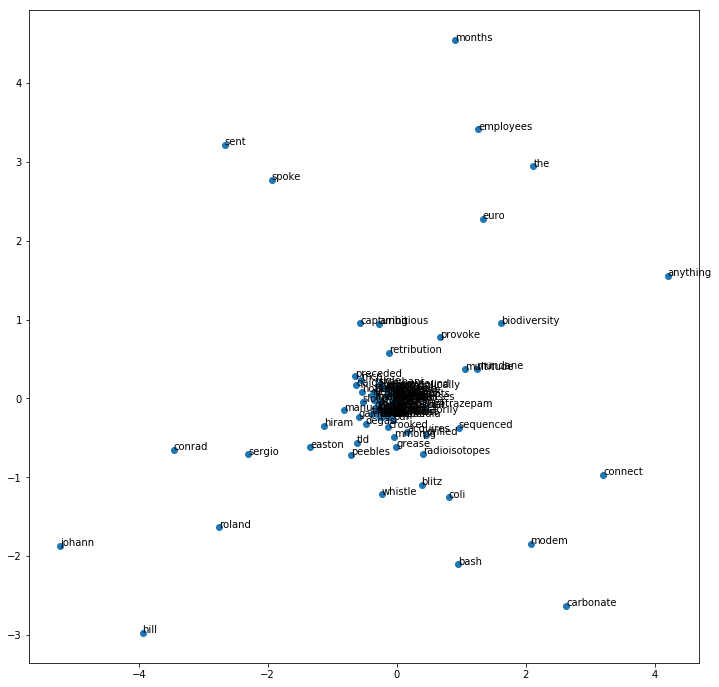

In [32]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

## Effect of vector dimension

#### Reducing the length to 50

In [33]:
model = Word2Vec(sentences, size=50)

In [34]:
model.wv.most_similar("money")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('payment', 0.7908158302307129),
 ('profits', 0.7903476357460022),
 ('credit', 0.7593300342559814),
 ('funds', 0.7548901438713074),
 ('compensation', 0.7524524331092834),
 ('payments', 0.7420149445533752),
 ('debts', 0.7310794591903687),
 ('buying', 0.7282137870788574),
 ('pay', 0.7243736386299133),
 ('savings', 0.7232431173324585)]

In [35]:
model.wv.most_similar("queen", topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.8373943567276001),
 ('princess', 0.8163850903511047),
 ('elizabeth', 0.8104601502418518),
 ('king', 0.7863413691520691),
 ('consort', 0.7419840693473816)]

In [36]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.7828245759010315),
 ('empress', 0.763997495174408),
 ('queen', 0.7433319091796875),
 ('emperor', 0.7362295985221863),
 ('son', 0.7339800596237183)]

#### Inreasing vector length to 300

In [37]:
model = word2vec.Word2Vec(sentences, size = 300)

In [38]:
model.wv.most_similar("money")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('profits', 0.7101462483406067),
 ('funds', 0.6906523108482361),
 ('credit', 0.6855447292327881),
 ('payment', 0.6722576022148132),
 ('payments', 0.6544635891914368),
 ('savings', 0.6452230215072632),
 ('buying', 0.6304600238800049),
 ('demand', 0.6303767561912537),
 ('pay', 0.6246674060821533),
 ('taxes', 0.6191917657852173)]

In [39]:
model.wv.most_similar("queen")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.7336795926094055),
 ('elizabeth', 0.7186208963394165),
 ('prince', 0.6914042234420776),
 ('consort', 0.6563066840171814),
 ('king', 0.6496994495391846),
 ('mary', 0.6448965668678284),
 ('regent', 0.6154910922050476),
 ('victoria', 0.6150223612785339),
 ('crown', 0.6126863956451416),
 ('duchess', 0.6055895090103149)]

In [40]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.6333423852920532),
 ('princess', 0.5610065460205078),
 ('elizabeth', 0.5594189763069153),
 ('throne', 0.5509335398674011),
 ('mary', 0.5452421307563782)]

## Skip gram vs CBOW

Simply put, the CBOW model learns the embedding by predicting the current word based on its context. The skip-gram model learns by predicting the surrounding words given a current word.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png)

#### Using Skipgram method

In [41]:
model_sg = word2vec.Word2Vec(sentences, size=100,sg=1)

In [42]:
model_sg.wv.most_similar("money")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dividends', 0.7613216638565063),
 ('profits', 0.7566142678260803),
 ('repay', 0.751291811466217),
 ('repayment', 0.7495837211608887),
 ('payments', 0.7455665469169617),
 ('credit', 0.743405818939209),
 ('bullion', 0.7340710759162903),
 ('surplus', 0.73326575756073),
 ('dues', 0.7325827479362488),
 ('lending', 0.7317253351211548)]

In [43]:
model_sg.wv.most_similar("queen")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('elizabeth', 0.7926336526870728),
 ('victoria', 0.7420297861099243),
 ('highness', 0.7382315993309021),
 ('hrh', 0.7380228042602539),
 ('prince', 0.7377315759658813),
 ('regnant', 0.7340838313102722),
 ('consort', 0.7339050769805908),
 ('princess', 0.7338464856147766),
 ('margrethe', 0.7252770662307739),
 ('king', 0.7138512134552002)]

In [44]:
model_sg.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.6470771431922913),
 ('matilda', 0.6301336288452148),
 ('sigismund', 0.610227108001709),
 ('prince', 0.6010273694992065),
 ('daughter', 0.5994096994400024)]

In [45]:
model_sg.wv.most_similar("meandering")

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sinuous', 0.9120197296142578),
 ('basaltic', 0.9112889170646667),
 ('troughs', 0.8923018574714661),
 ('undulating', 0.8898401856422424),
 ('uplifted', 0.8862215280532837),
 ('eskers', 0.8844640851020813),
 ('wadis', 0.8831128478050232),
 ('featureless', 0.8824383020401001),
 ('steeper', 0.8792284727096558),
 ('outwash', 0.87591952085495)]

#### Learning:
In CBOW the vectors from the context words are averaged before predicting the center word. In skip-gram there is no averaging of embedding vectors. It seems like the model can learn better representations for the rare words when their vectors are not averaged with the other context words in the process of making the predictions. 

## Word vectors trained on different contexts
 - We'll load different corpora, from different contexts and see how the embeddings vary
 - The text8 corpus is wikipedia pages, while Brown corpus is from 15 different topics, and movie reviews are from IMDB

In [48]:
from nltk.corpus import brown, movie_reviews
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shivank/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [49]:
model_brown = Word2Vec(brown.sents(), sg=1)
model_movie = Word2Vec(movie_reviews.sents(), sg=1, window=5)

In [50]:
model_sg.wv.most_similar('money', topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dividends', 0.7613216638565063),
 ('profits', 0.7566142678260803),
 ('repay', 0.751291811466217),
 ('repayment', 0.7495837211608887),
 ('payments', 0.7455665469169617)]

In [51]:
model_brown.wv.most_similar('money', topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('care', 0.8571999073028564),
 ('job', 0.8509190678596497),
 ('friendship', 0.8313701748847961),
 ('joy', 0.8191862106323242),
 ('luck', 0.8150743246078491)]

In [52]:
model_movie.wv.most_similar('money', topn=5)

/Users/shivank/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cash', 0.7342875599861145),
 ('ransom', 0.7172436714172363),
 ('paid', 0.7006223797798157),
 ('brain', 0.6920941472053528),
 ('record', 0.6893734335899353)]

 
I hope it’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. 

## Using pre-trained word vectors

### A quick note on Glove:
   - Developed by Stanford by training on 6 Billion tokens
   - Objective is slightly different
   - End result very similar to Google's word2vec

https://nlp.stanford.edu/projects/glove/

- We'll use the 100D vectors for this example.
- The trained vectors are available in a text file
- The format is slightly different from that of word2vec, necessitating the use of a utility to format accordingly

In [53]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.w2vformat.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("glove.6B.100d.w2vformat.txt", binary=False)

#### Now you can use all the methods you used with word2vec models

In [ ]:
glove_model.most_similar("king")

In [ ]:
glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

In [ ]:
glove_model.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)